In [222]:
# install library
! pip install google-play-scraper

In [223]:
# import library
from google_play_scraper import  Sort, reviews_all
from google_play_scraper import reviews
from google_play_scraper import app

# import pandas yang digunakan untuk analisis dan manipulasi data
import pandas as pd

# import numpy yang digunakan untuk memproses array multidimensi
import numpy as np

SCRAPING

In [224]:
# mulai scraping
result, continuation_token = reviews(
    'com.ruangguru.livestudents',
    lang='id', #bahasa indonesia
    country='id', #negara indonesia
    sort=Sort.MOST_RELEVANT, #sorting yang paling relevan
    count=1000, #jumlah dataset
    filter_score_with=None #mulai scraping: 1,2,3,4,5, jadi nanti none nya bisa di ganti mau bintang berapa
)

In [225]:
# membuat Dataframe dari hasil scraping
data = pd.DataFrame(np.array(result),columns=['review'])

data = data.join(pd.DataFrame(data.pop('review').tolist()))

data #menampilkan semua data

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,924c87f5-d5e1-49b7-8d0c-93e5005b4877,Aji Abdillah Mursyid,https://play-lh.googleusercontent.com/a/ACg8oc...,terkadang ketika di pembahasan angkanya itu te...,4,4,7.0.4,2025-10-02 19:22:25,Maaf ya kalau angka atau huruf di pembahasan t...,2025-10-03 03:47:25,7.0.4
1,a5529b81-f622-4f5a-a1d2-f77048bd4094,Keysyah radiah Amanah,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi belajar terbaik sejauh ini! Materinya...,5,284,6.99.0,2025-08-18 03:34:09,"Hai Keysyah, terima kasih banyak sudah kasih b...",2025-08-18 04:40:49,6.99.0
2,658876ea-30e9-4a46-b29d-f1f9d761af50,rasya apriyanto,https://play-lh.googleusercontent.com/a/ACg8oc...,"menurut saya udah bagus cuman, cara nawarin pa...",4,1,7.0.4,2025-10-12 11:52:54,Maaf kalau sempat membuat jadi kurang nyaman. ...,2025-10-14 04:39:06,7.0.4
3,85011ad4-0437-4310-bebe-c51f54708515,Renata Pasaribu,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasinya sangat menyenangkan bisa langsung ...,5,266,6.99.0,2025-08-03 07:22:33,Wah senang banget dengarnya! Makasih ya Renata...,2025-08-05 07:51:11,6.99.0
4,545a6f5e-a46c-44eb-b3c3-6271d48d6d63,Dinar hafizah berliani,https://play-lh.googleusercontent.com/a/ACg8oc...,jujur aplikasinya lumayan membantu aku buat me...,5,207,7.0.2,2025-09-02 02:14:10,Wihh keren banget semangat belajarnya Dinar! M...,2025-09-03 03:19:08,7.0.2
...,...,...,...,...,...,...,...,...,...,...,...
995,32040f47-e403-4b9c-af9c-8473f0866158,Adiyatma Rafi,https://play-lh.googleusercontent.com/a/ACg8oc...,"•sesudah liat satu materi,mau lanjut ke Vidio ...",5,0,None,2020-07-19 04:55:49,Hai. Mohon maaf atas kendala yang dialami. Yuk...,2020-08-06 14:11:40,None
996,9c74cc5d-5a76-4d5a-97c0-4256a785cec2,Adelia Zafira,https://play-lh.googleusercontent.com/a/ACg8oc...,"Semua materi ada, untuk semua kurikulum.. Teru...",5,67,6.11.0,2021-04-04 10:09:15,"Hai Adelia, terima kasih atas apresiasi yang k...",2021-04-04 10:20:19,6.11.0
997,a144ceb8-912a-48da-87e0-86c6dda6f010,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini gimana ya kok saya tidak bisa mencoba lati...,2,0,None,2019-12-03 12:20:23,Hai Yoga. Terima kasih sudah menggunakan Aplik...,2019-12-03 12:26:51,None
998,aeedf06a-3b6d-4c74-8a58-4057dfc634e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya senang dengan update terbaru ruangguru de...,4,1,None,2018-10-23 12:09:15,"Halo Jupri, terimakasih sudah memberikan revie...",2018-10-29 03:02:49,None


CASE FOLDING

In [226]:
# Fungsi case folding
data['content_casefold'] = data['content'].astype(str).str.lower()

In [227]:
# Simpan ke CSV
data.to_csv("ruangguru_reviews.csv", index=False, encoding='utf-8-sig')

PREPROCESSED

In [228]:
# Membaca data hasil scraping lama
data = pd.read_csv('ruangguru_reviews.csv')
print("Jumlah data:", len(data))
data.head()

Jumlah data: 1000


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_casefold
0,924c87f5-d5e1-49b7-8d0c-93e5005b4877,Aji Abdillah Mursyid,https://play-lh.googleusercontent.com/a/ACg8oc...,terkadang ketika di pembahasan angkanya itu te...,4,4,7.0.4,2025-10-02 19:22:25,Maaf ya kalau angka atau huruf di pembahasan t...,2025-10-03 03:47:25,7.0.4,terkadang ketika di pembahasan angkanya itu te...
1,a5529b81-f622-4f5a-a1d2-f77048bd4094,Keysyah radiah Amanah,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi belajar terbaik sejauh ini! Materinya...,5,284,6.99.0,2025-08-18 03:34:09,"Hai Keysyah, terima kasih banyak sudah kasih b...",2025-08-18 04:40:49,6.99.0,aplikasi belajar terbaik sejauh ini! materinya...
2,658876ea-30e9-4a46-b29d-f1f9d761af50,rasya apriyanto,https://play-lh.googleusercontent.com/a/ACg8oc...,"menurut saya udah bagus cuman, cara nawarin pa...",4,1,7.0.4,2025-10-12 11:52:54,Maaf kalau sempat membuat jadi kurang nyaman. ...,2025-10-14 04:39:06,7.0.4,"menurut saya udah bagus cuman, cara nawarin pa..."
3,85011ad4-0437-4310-bebe-c51f54708515,Renata Pasaribu,https://play-lh.googleusercontent.com/a/ACg8oc...,aplikasinya sangat menyenangkan bisa langsung ...,5,266,6.99.0,2025-08-03 07:22:33,Wah senang banget dengarnya! Makasih ya Renata...,2025-08-05 07:51:11,6.99.0,aplikasinya sangat menyenangkan bisa langsung ...
4,545a6f5e-a46c-44eb-b3c3-6271d48d6d63,Dinar hafizah berliani,https://play-lh.googleusercontent.com/a/ACg8oc...,jujur aplikasinya lumayan membantu aku buat me...,5,207,7.0.2,2025-09-02 02:14:10,Wihh keren banget semangat belajarnya Dinar! M...,2025-09-03 03:19:08,7.0.2,jujur aplikasinya lumayan membantu aku buat me...


In [229]:
# mengambil fitur hanya konten dan score
data = data[['content','score']]
data

,content,score
0,terkadang ketika di pembahasan angkanya itu te...,4
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5
2,"menurut saya udah bagus cuman, cara nawarin pa...",4
3,aplikasinya sangat menyenangkan bisa langsung ...,5
4,jujur aplikasinya lumayan membantu aku buat me...,5
...,...,...
995,"•sesudah liat satu materi,mau lanjut ke Vidio ...",5
996,"Semua materi ada, untuk semua kurikulum.. Teru...",5
997,Ini gimana ya kok saya tidak bisa mencoba lati...,2
998,Saya senang dengan update terbaru ruangguru de...,4


In [230]:
for label, group in data.groupby('score'):
    print(f"\nScore: {label}")
    print(group[['content', 'score']].head())



Score: 1
                                              content  score
9   mimiiiiinnn, aku cuma mau belajar miin, kenapa...      1
14  sumpah ya, cs nya ga bgt, pernah sampe nanya h...      1
16  kenapa kok akhir2 ini aplikasi gak bisa dibuka...      1
20  kecewa banget setiap masuk ke apk ruangguru pa...      1
32  materi pelajaran nya bikin bingung, gak lengka...      1

Score: 2
                                               content  score
18   pas buka aplikasinya suka keluar terus, padaha...      2
29   Untuk aplikasinya sangat baik, namun dari sisi...      2
68   kenapa lemot bgt ya, padahal wifi aman, meori ...      2
70   Untuk kelas offline nya udah bagus saya ikut, ...      2
107  bagus banget cuma kesel sama pas kerjain kuis ...      2

Score: 3
                                              content  score
11  bagus, lengkap, adaptonya juga keren, tapi gak...      3
13  sy mengalami kendala dmn hri ini sy menjwb soa...      3
19  Tolong optimalkan sistemnya dong, Tka sudah m

In [231]:
# teks preprocessing dengan NLTK
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [232]:
# Hapus Duplikat
data = data.drop_duplicates(subset='content').reset_index(drop=True)

print("\n=== SETELAH HAPUS DUPLIKAT ===")
print(data)


=== SETELAH HAPUS DUPLIKAT ===
                                               content  score
0    terkadang ketika di pembahasan angkanya itu te...      4
1    Aplikasi belajar terbaik sejauh ini! Materinya...      5
2    menurut saya udah bagus cuman, cara nawarin pa...      4
3    aplikasinya sangat menyenangkan bisa langsung ...      5
4    jujur aplikasinya lumayan membantu aku buat me...      5
..                                                 ...    ...
993  •sesudah liat satu materi,mau lanjut ke Vidio ...      5
994  Semua materi ada, untuk semua kurikulum.. Teru...      5
995  Ini gimana ya kok saya tidak bisa mencoba lati...      2
996  Saya senang dengan update terbaru ruangguru de...      4
997  Suka banget💛 Pembahasan mudah dimengerti karen...      5

[998 rows x 2 columns]


In [233]:
# Hapus URL, Mention, Hashtag, Emoji
import re

def remove_url_mention_hashtag_emoji(text):
    text = re.sub(r'http\S+|www\S+', '', text)          # URL
    text = re.sub(r'@\w+', '', text)                    # Mention
    text = re.sub(r'#\w+', '', text)                    # Hashtag
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)          # Emoji
    return text

data['clean_text'] = data['content'].apply(remove_url_mention_hashtag_emoji)
data.head()

,content,score,clean_text
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini! Materinya...
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,"menurut saya udah bagus cuman, cara nawarin pa..."
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...


In [234]:
# Hapus angka & tanda baca
def remove_number_punct(text):
    text = re.sub(r'\d+', '', text)  # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data['clean_text'] = data['clean_text'].apply(remove_number_punct)
data.head()

,content,score,clean_text
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini Materinya ...
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,menurut saya udah bagus cuman cara nawarin pak...
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...


In [235]:
# Hapus Spasi berlebihan pada teks mentah
def remove_extra_spaces(text):
    return " ".join(text.split())

data['tanpa_spasi_berlebih'] = data['clean_text'].apply(remove_extra_spaces)
data.head()

,content,score,clean_text,tanpa_spasi_berlebih
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...,terkadang ketika di pembahasan angkanya itu te...
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini Materinya ...,Aplikasi belajar terbaik sejauh ini Materinya ...
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,menurut saya udah bagus cuman cara nawarin pak...,menurut saya udah bagus cuman cara nawarin pak...
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...,aplikasinya sangat menyenangkan bisa langsung ...
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...,jujur aplikasinya lumayan membantu aku buat me...


In [236]:
# Tokenisasi teks menjadi list kata
from nltk.tokenize import word_tokenize

# Fungsi untuk melakukan tokenisasi
def tokenize_text(text):
    return word_tokenize(text)

# Menambahkan kolom baru 'tokenize_content'
data['tokenize_content'] = data['tanpa_spasi_berlebih'].apply(tokenize_text)

# Menampilkan hasilnya
data.head()

,content,score,clean_text,tanpa_spasi_berlebih,tokenize_content
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...,terkadang ketika di pembahasan angkanya itu te...,"[terkadang, ketika, di, pembahasan, angkanya, ..."
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini Materinya ...,Aplikasi belajar terbaik sejauh ini Materinya ...,"[Aplikasi, belajar, terbaik, sejauh, ini, Mate..."
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,menurut saya udah bagus cuman cara nawarin pak...,menurut saya udah bagus cuman cara nawarin pak...,"[menurut, saya, udah, bagus, cuman, cara, nawa..."
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...,aplikasinya sangat menyenangkan bisa langsung ...,"[aplikasinya, sangat, menyenangkan, bisa, lang..."
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...,jujur aplikasinya lumayan membantu aku buat me...,"[jujur, aplikasinya, lumayan, membantu, aku, b..."


In [237]:
import string

# Fungsi untuk menghapus tanda baca
def remove_punctuation(tokens):
    table = str.maketrans("", "", string.punctuation)
    return [word.translate(table) for word in tokens if word.translate(table) != ""]

# Menambahkan kolom baru tanpa tanda baca
data['tanpa_tanda_baca'] = data['tokenize_content'].apply(remove_punctuation)

# Menampilkan hasilnya
data.head()


,content,score,clean_text,tanpa_spasi_berlebih,tokenize_content,tanpa_tanda_baca
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...,terkadang ketika di pembahasan angkanya itu te...,"[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ..."
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini Materinya ...,Aplikasi belajar terbaik sejauh ini Materinya ...,"[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate..."
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,menurut saya udah bagus cuman cara nawarin pak...,menurut saya udah bagus cuman cara nawarin pak...,"[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa..."
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...,aplikasinya sangat menyenangkan bisa langsung ...,"[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang..."
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...,jujur aplikasinya lumayan membantu aku buat me...,"[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b..."


In [238]:
# Fungsi untuk menghapus spasi/tab di awal dan akhir setiap token
def clean_whitespace(tokens):
    return [token.strip() for token in tokens]

# Menambahkan kolom baru tanpa white space
data['white_space'] = data['tanpa_tanda_baca'].apply(clean_whitespace)

# Menampilkan hasilnya
data.head()

,content,score,clean_text,tanpa_spasi_berlebih,tokenize_content,tanpa_tanda_baca,white_space
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...,terkadang ketika di pembahasan angkanya itu te...,"[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ..."
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini Materinya ...,Aplikasi belajar terbaik sejauh ini Materinya ...,"[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate..."
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,menurut saya udah bagus cuman cara nawarin pak...,menurut saya udah bagus cuman cara nawarin pak...,"[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa..."
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...,aplikasinya sangat menyenangkan bisa langsung ...,"[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang..."
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...,jujur aplikasinya lumayan membantu aku buat me...,"[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b..."


In [239]:
# case folding

# mengubah ulasan menjadi huruf kecil (lower case)
data['case_folding'] = data['white_space'].apply(lambda tokens: [token.lower() for token in tokens])

# menampilkan dataframe dengan kolom baru 'case_folding'
data.head()

,content,score,clean_text,tanpa_spasi_berlebih,tokenize_content,tanpa_tanda_baca,white_space,case_folding
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...,terkadang ketika di pembahasan angkanya itu te...,"[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ..."
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini Materinya ...,Aplikasi belajar terbaik sejauh ini Materinya ...,"[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[aplikasi, belajar, terbaik, sejauh, ini, mate..."
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,menurut saya udah bagus cuman cara nawarin pak...,menurut saya udah bagus cuman cara nawarin pak...,"[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa..."
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...,aplikasinya sangat menyenangkan bisa langsung ...,"[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang..."
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...,jujur aplikasinya lumayan membantu aku buat me...,"[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b..."


In [240]:
# stopwords (kata di tulis tetapi tidak ada artinya atau kata umum yang bermakna)

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# mengambil semua kamus stopwords bahasa indonesia
stop_words = set(stopwords.words('indonesian'))

# fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
  return [token for token in tokens if token not in stop_words]

# menambahkan kolom baru tanpa_stopwords
data['tanpa_stopwords'] = data['case_folding'].apply(remove_stopwords)

# menampilkan dataframe dengan kolom baru 'tanpa_stopwords'
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content,score,clean_text,tanpa_spasi_berlebih,tokenize_content,tanpa_tanda_baca,white_space,case_folding,tanpa_stopwords
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...,terkadang ketika di pembahasan angkanya itu te...,"[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, pembahasan, angkanya, terlallu, ku..."
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini Materinya ...,Aplikasi belajar terbaik sejauh ini Materinya ...,"[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[aplikasi, belajar, terbaik, sejauh, ini, mate...","[aplikasi, belajar, terbaik, materinya, lengka..."
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,menurut saya udah bagus cuman cara nawarin pak...,menurut saya udah bagus cuman cara nawarin pak...,"[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[udah, bagus, cuman, nawarin, paket, belajarny..."
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...,aplikasinya sangat menyenangkan bisa langsung ...,"[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, menyenangkan, langsung, chat, wa..."
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...,jujur aplikasinya lumayan membantu aku buat me...,"[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, memaha..."


In [241]:
import re

# =====================================================
# 🧩 NORMALISASI KATA SLANG, TYPO, DAN PEMBERSIHAN TOKEN
# =====================================================

# Kamus slang
slang_dict = {
    'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'ngga': 'tidak',
    'bgt': 'banget', 'beneran': 'benar', 'tp': 'tapi', 'jd': 'jadi',
    'jg': 'juga', 'udh': 'sudah', 'udah': 'sudah', 'aja': 'saja',
    'sm': 'sama', 'dr': 'dari', 'dl': 'dulu', 'bgs': 'bagus',
    'bgus': 'bagus', 'mksdnya': 'maksudnya', 'krn': 'karena',
    'trs': 'terus', 'bntu': 'bantu', 'mksd': 'maksud', 'apk': 'aplikasi',
    'trmksh': 'terima kasih', 'trims': 'terima kasih',
    'makasih': 'terima kasih', 'makasi': 'terima kasih',
    'terimakasih': 'terima kasih', 'sbnrnya': 'sebenarnya',
    'bner': 'benar', 'msh': 'masih', 'skrng': 'sekarang',
    'dlm': 'dalam', 'dpt': 'dapat', 'kl': 'kalau', 'klo': 'kalau',
    'klau': 'kalau', 'tdk': 'tidak', 'bkn': 'bukan', 'lg': 'lagi',
    'nyoba': 'mencoba', 'bisaaa': 'bisa', 'bangett': 'banget',
    'baguss': 'bagus', 'ok': 'oke', 'oke': 'baik', 'okey': 'baik'
}

# Tambahkan daftar kata meaningless
extra_stopwords = set([
    'ya', 'app', 'yg', 'nya', 'nih', 'nihh', 'kok', 'lah', 'dong',
    'ku', 'sy', 'loh', 'deh', 'aja', 'lahh', 'yah', 'yahh', 'mak',
    'oke', 'okey', 'okeyy', 'okayy', 'woow', 'wow', 'hehe', 'haha'
])

# Daftar kata khusus yang ingin dihapus total
hapus_khusus = {'ruangguru', 'ruang', 'guru'}

# 🔧 Hapus huruf berulang (contoh: "bagusss" → "bagus")
def remove_repeated_letters(word):
    return re.sub(r'(.)\1{2,}', r'\1', word)

# 🔧 Fungsi normalisasi lengkap
def normalize_tokens(tokens):
    normalized = []
    for token in tokens:
        token = token.lower()
        token = remove_repeated_letters(token)

        # ubah slang jika ada di kamus
        if token in slang_dict:
            token = slang_dict[token]

        # hanya ambil kata > 3 huruf dan bukan kata meaningless / hapus khusus
        if len(token) > 3 and token not in extra_stopwords and token not in hapus_khusus:
            normalized.append(token)
    return normalized

# ✅ Panggil fungsi yang benar
data['tokens_normalized'] = data['tanpa_stopwords'].apply(normalize_tokens)

data.head()


,content,score,clean_text,tanpa_spasi_berlebih,tokenize_content,tanpa_tanda_baca,white_space,case_folding,tanpa_stopwords,tokens_normalized
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...,terkadang ketika di pembahasan angkanya itu te...,"[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, pembahasan, angkanya, terlallu, ku...","[terkadang, pembahasan, angkanya, terlallu, ku..."
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini Materinya ...,Aplikasi belajar terbaik sejauh ini Materinya ...,"[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[aplikasi, belajar, terbaik, sejauh, ini, mate...","[aplikasi, belajar, terbaik, materinya, lengka...","[aplikasi, belajar, terbaik, materinya, lengka..."
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,menurut saya udah bagus cuman cara nawarin pak...,menurut saya udah bagus cuman cara nawarin pak...,"[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[udah, bagus, cuman, nawarin, paket, belajarny...","[sudah, bagus, cuman, nawarin, paket, belajarn..."
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...,aplikasinya sangat menyenangkan bisa langsung ...,"[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, menyenangkan, langsung, chat, wa...","[aplikasinya, menyenangkan, langsung, chat, pe..."
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...,jujur aplikasinya lumayan membantu aku buat me...,"[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, memaha...","[jujur, aplikasinya, lumayan, membantu, memaha..."


In [242]:
!pip install Sastrawi

In [243]:
# STEMMING (akar kata dengan Sastrawi)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # ← tambahkan ini

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_tokens(tokens):
    return [stemmer.stem(t) for t in tokens]

data['tokens_stemmed'] = data['tokens_normalized'].apply(stem_tokens)
data.head()

,content,score,clean_text,tanpa_spasi_berlebih,tokenize_content,tanpa_tanda_baca,white_space,case_folding,tanpa_stopwords,tokens_normalized,tokens_stemmed
0,terkadang ketika di pembahasan angkanya itu te...,4,terkadang ketika di pembahasan angkanya itu te...,terkadang ketika di pembahasan angkanya itu te...,"[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, ketika, di, pembahasan, angkanya, ...","[terkadang, pembahasan, angkanya, terlallu, ku...","[terkadang, pembahasan, angkanya, terlallu, ku...","[terkadang, bahas, angka, terlallu, harap, ser..."
1,Aplikasi belajar terbaik sejauh ini! Materinya...,5,Aplikasi belajar terbaik sejauh ini Materinya ...,Aplikasi belajar terbaik sejauh ini Materinya ...,"[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[Aplikasi, belajar, terbaik, sejauh, ini, Mate...","[aplikasi, belajar, terbaik, sejauh, ini, mate...","[aplikasi, belajar, terbaik, materinya, lengka...","[aplikasi, belajar, terbaik, materinya, lengka...","[aplikasi, ajar, baik, materi, lengkap, jelas,..."
2,"menurut saya udah bagus cuman, cara nawarin pa...",4,menurut saya udah bagus cuman cara nawarin pak...,menurut saya udah bagus cuman cara nawarin pak...,"[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[menurut, saya, udah, bagus, cuman, cara, nawa...","[udah, bagus, cuman, nawarin, paket, belajarny...","[sudah, bagus, cuman, nawarin, paket, belajarn...","[sudah, bagus, cuman, nawarin, paket, ajar, ov..."
3,aplikasinya sangat menyenangkan bisa langsung ...,5,aplikasinya sangat menyenangkan bisa langsung ...,aplikasinya sangat menyenangkan bisa langsung ...,"[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, sangat, menyenangkan, bisa, lang...","[aplikasinya, menyenangkan, langsung, chat, wa...","[aplikasinya, menyenangkan, langsung, chat, pe...","[aplikasi, senang, langsung, chat, bina, trus,..."
4,jujur aplikasinya lumayan membantu aku buat me...,5,jujur aplikasinya lumayan membantu aku buat me...,jujur aplikasinya lumayan membantu aku buat me...,"[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, aku, b...","[jujur, aplikasinya, lumayan, membantu, memaha...","[jujur, aplikasinya, lumayan, membantu, memaha...","[jujur, aplikasi, lumayan, bantu, paham, mater..."


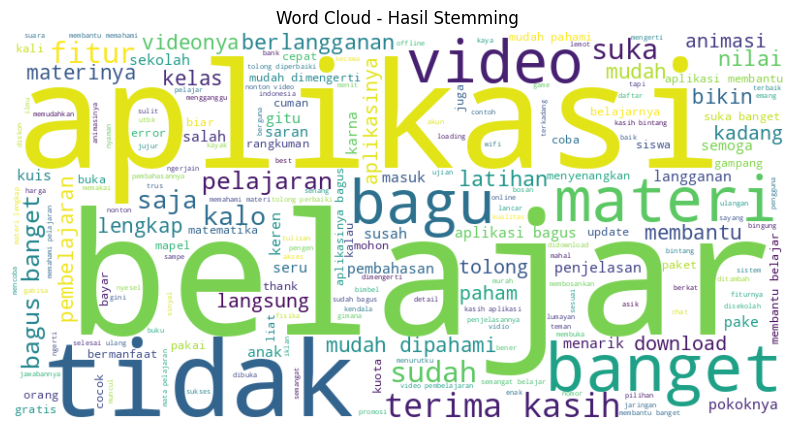

In [244]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# gunakan kolom hasil preprocessing terakhir
all_content = ' '.join([' '.join(token) for token in data['tokens_normalized']])

# buat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_content)

# tampilkan WordCloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud - Hasil Stemming')
plt.axis('off')
plt.show()


In [245]:
from nltk import FreqDist
# frekuensi kemunculan per kata"

# menggunakan semua token dari kolom hasil stemming
all_tokens = [token for sublist in data['tokens_normalized'] for token in sublist]

# menggunakan frekuensi kata dari list gabungan
word_freq_total = FreqDist(all_tokens)

# menampilkan 20 kata yang paling sering muncul
word_freq_total.most_common(20)

[('belajar', 567),
 ('aplikasi', 477),
 ('bagus', 442),
 ('banget', 438),
 ('video', 332),
 ('tidak', 304),
 ('materi', 304),
 ('mudah', 272),
 ('membantu', 214),
 ('sudah', 184),
 ('suka', 177),
 ('fitur', 154),
 ('pelajaran', 152),
 ('tolong', 131),
 ('terima kasih', 131),
 ('saja', 129),
 ('kalo', 120),
 ('kasih', 118),
 ('aplikasinya', 113),
 ('pembelajaran', 109)]

In [246]:
# Setelah selesai normalisasi
data['tokens_normalized'] = data['tanpa_stopwords'].apply(normalize_tokens)

# Gabungkan kembali token yang sudah dibersihkan jadi 1 string per ulasan
data['cleaned_text'] = data['tokens_normalized'].apply(lambda x: ' '.join(x))

# Simpan ke CSV
data.to_csv("ruangguru_preprocessed.csv", index=False, encoding='utf-8-sig')

print("✅ File hasil preprocessing berhasil disimpan sebagai 'ruangguru_preprocessed.csv'")


✅ File hasil preprocessing berhasil disimpan sebagai 'ruangguru_preprocessed.csv'


N-GRAM

In [256]:
from sklearn.feature_extraction.text import CountVectorizer

def generate_ngrams(texts, ngram_range=(1,1), top_n=20):
    # Membuat vectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range)

    # Fit & transform teks
    X = vectorizer.fit_transform(texts)

    # Ambil frekuensi setiap n-gram
    sum_words = X.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

    # Urutkan dari yang paling sering muncul
    sorted_words = sorted(words_freq, key=lambda x: x[1], reverse=True)

    return sorted_words[:top_n]

In [259]:
# Unigram
top_unigram = generate_ngrams(data['cleaned_text'], ngram_range=(1,1), top_n=20)
print("🔹 20 Unigram Teratas:\n", top_unigram)

# BIGRAM
top_bigram = generate_ngrams(data['cleaned_text'], ngram_range=(2,2), top_n=20)
print("\n🔹 20 Bigram Teratas:\n", top_bigram)

# TRIGRAM
top_trigram = generate_ngrams(data['cleaned_text'], ngram_range=(3,3), top_n=20)
print("\n🔹 20 Trigram Teratas:\n", top_trigram)


🔹 20 Unigram Teratas:
 [('belajar', np.int64(567)), ('aplikasi', np.int64(477)), ('bagus', np.int64(442)), ('banget', np.int64(438)), ('video', np.int64(332)), ('tidak', np.int64(304)), ('materi', np.int64(304)), ('mudah', np.int64(272)), ('kasih', np.int64(249)), ('membantu', np.int64(214)), ('terima', np.int64(197)), ('sudah', np.int64(184)), ('suka', np.int64(177)), ('fitur', np.int64(154)), ('pelajaran', np.int64(152)), ('tolong', np.int64(131)), ('saja', np.int64(129)), ('kalo', np.int64(120)), ('aplikasinya', np.int64(113)), ('pembelajaran', np.int64(109))]

🔹 20 Bigram Teratas:
 [('terima kasih', np.int64(195)), ('bagus banget', np.int64(95)), ('mudah dipahami', np.int64(82)), ('aplikasi bagus', np.int64(65)), ('aplikasi membantu', np.int64(46)), ('aplikasinya bagus', np.int64(42)), ('suka banget', np.int64(42)), ('mudah dimengerti', np.int64(41)), ('membantu belajar', np.int64(34)), ('aplikasi belajar', np.int64(32)), ('mudah pahami', np.int64(32)), ('banget belajar', np.int64(

In [260]:
# --- 5. Ubah ke DataFrame ---
df_unigram = pd.DataFrame(top_unigram, columns=['Unigram', 'Frequency'])
df_bigram = pd.DataFrame(top_bigram, columns=['Bigram', 'Frequency'])
df_trigram = pd.DataFrame(top_trigram, columns=['Trigram', 'Frequency'])


/tmp/ipython-input-1136165492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Unigram', data=df_unigram, palette='cool')


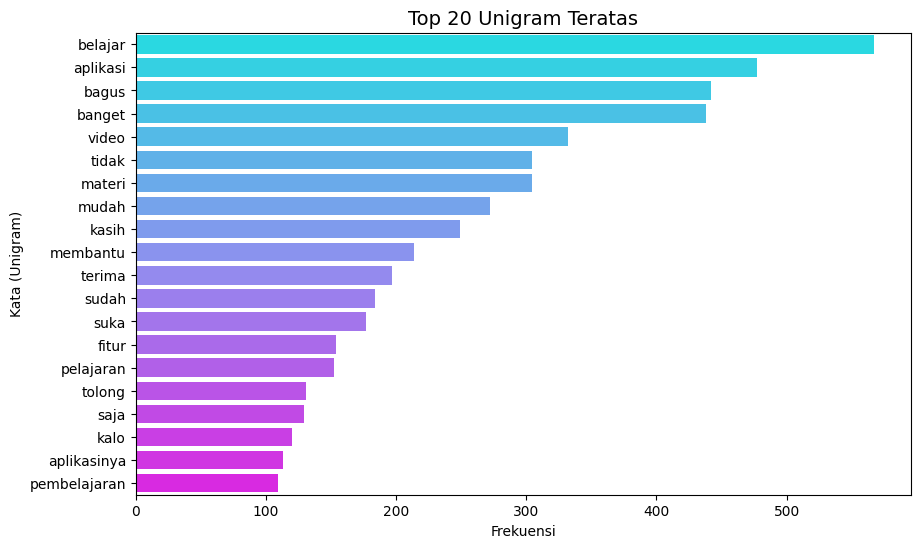

In [261]:
# --- 6. Visualisasi Unigram ---
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Unigram', data=df_unigram, palette='cool')
plt.title('Top 20 Unigram Teratas', fontsize=14)
plt.xlabel('Frekuensi')
plt.ylabel('Kata (Unigram)')
plt.show()

/tmp/ipython-input-3173518612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=df_bigram, palette='viridis')


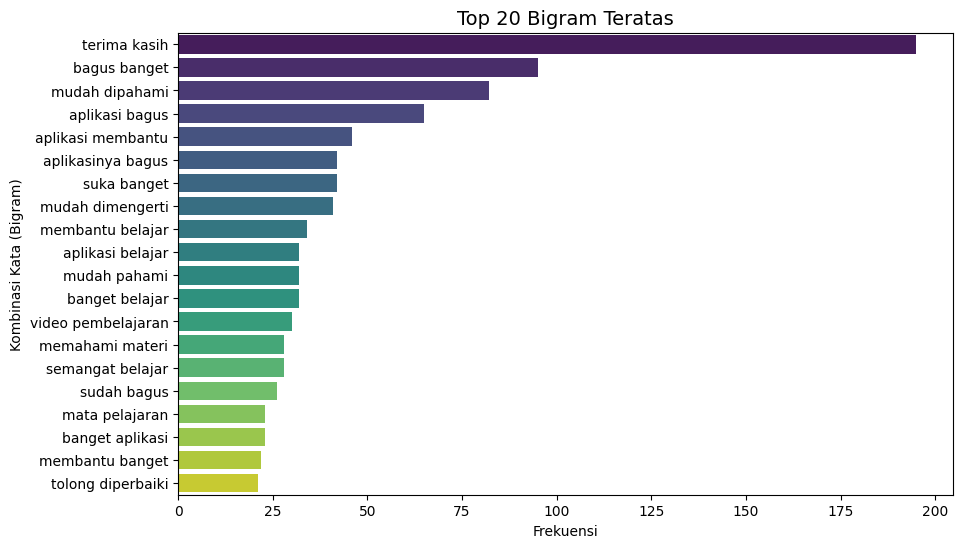

In [262]:
# --- 7. Visualisasi Bigram ---
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Bigram', data=df_bigram, palette='viridis')
plt.title('Top 20 Bigram Teratas', fontsize=14)
plt.xlabel('Frekuensi')
plt.ylabel('Kombinasi Kata (Bigram)')
plt.show()

/tmp/ipython-input-4157055253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=df_trigram, palette='magma')


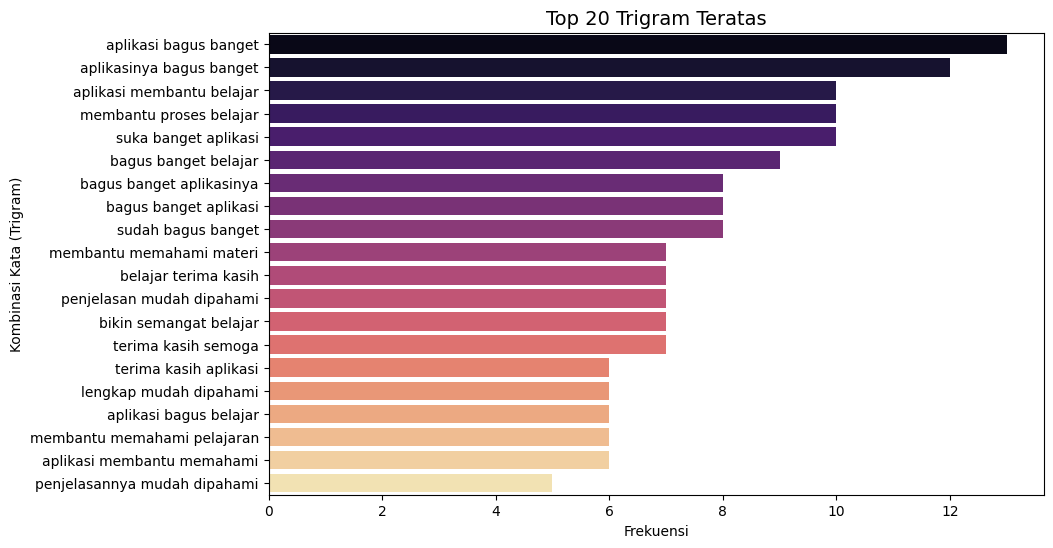

In [263]:
# --- 8. Visualisasi Trigram ---
plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Trigram', data=df_trigram, palette='magma')
plt.title('Top 20 Trigram Teratas', fontsize=14)
plt.xlabel('Frekuensi')
plt.ylabel('Kombinasi Kata (Trigram)')
plt.show()

In [264]:
# --- 9. Simpan ke CSV ---
df_unigram.to_csv('unigram_ruangguru.csv', index=False, encoding='utf-8-sig')
df_bigram.to_csv('bigram_ruangguru.csv', index=False, encoding='utf-8-sig')
df_trigram.to_csv('trigram_ruangguru.csv', index=False, encoding='utf-8-sig')

print("✅ Unigram, Bigram, dan Trigram berhasil dibuat, divisualisasikan, dan disimpan sebagai CSV!")

✅ Unigram, Bigram, dan Trigram berhasil dibuat, divisualisasikan, dan disimpan sebagai CSV!
